## Part a)

Write a function which sets up a one-qubit basis and apply the various
Pauli matrices to these basis states. 
 Apply the Hadamard and Phase
gates to the same one-qubit basis states and study their actions on
these states. 

In [7]:
import qiskit as qk
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
from qiskit import transpile

# initialize constants for quantum circuit
nqubits = 1
ncbits = 1
qreg = qk.QuantumRegister(nqubits)
creg = qk.ClassicalRegister(ncbits)

# create circuit, apply gate and draw the circuit (you sadly can't draw multiple circuits, so just change the gate for each gate you want to analyze)
c = qk.QuantumCircuit(qreg,creg)
c.x(qreg[0])
c.measure(qreg[0], creg[0])
c.draw()


┌───┐┌─┐
  q8: ┤ X ├┤M├
      └───┘└╥┘
c7: 1/══════╩═
            0

Define also Bell states and write a code where you
implement a Hadamard gate and thereafter a **CNOT** gate on one of the Bell
states of your choice. Perform thereafter a measurement on the first qubit and
thereafter on the second qubit. The measurements should be performed 
several times and it is the average results of these measurements
which should be discussed and presented.

Compare your code with the results obtained using **Qiskit** from the lectures of week 5.

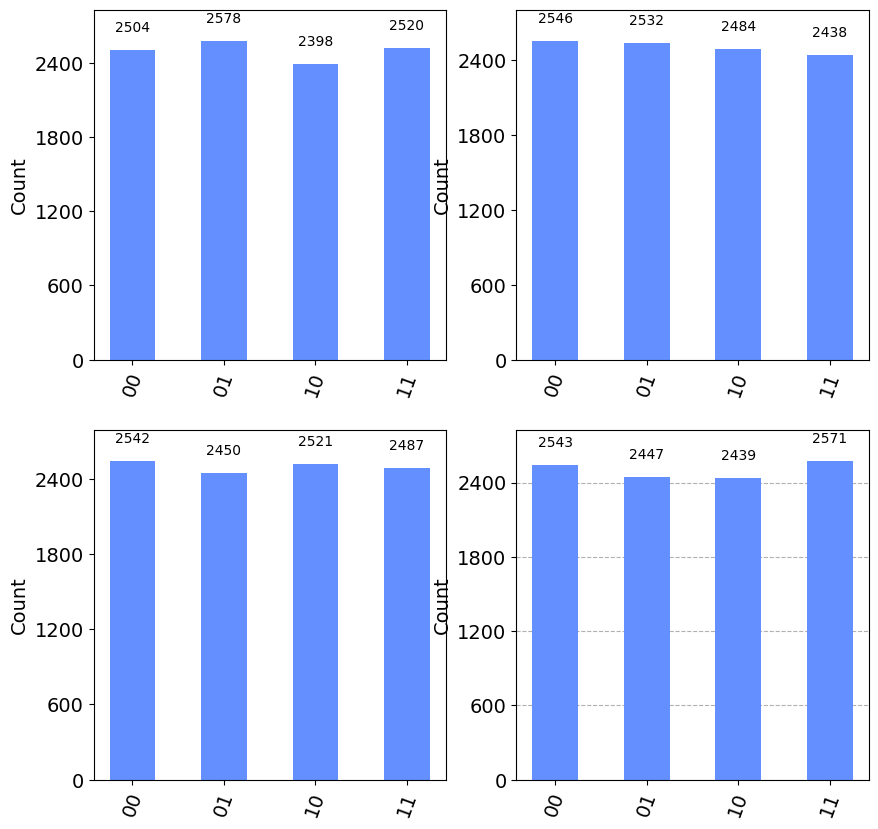

In [31]:
# initalize Bell states
phi_plus = QuantumCircuit(2,2)
phi_plus.h(0)
phi_plus.cx(0,1)
phi_plus.measure([0,1],[0,1])

phi_minus = QuantumCircuit(2,2)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.z(0) # you can flip 1 in this case too, but not both obviously
phi_minus.measure([0,1],[0,1])

psi_plus = QuantumCircuit(2,2)
psi_plus.h(0)
psi_plus.cx(0,1)
psi_plus.x(0) 
psi_plus.measure([0,1],[0,1])

psi_minus = QuantumCircuit(2,2)
psi_minus.h(0)
psi_minus.cx(0,1)
psi_minus.x(0)
psi_minus.z(0)
psi_minus.measure([0,1],[0,1])

bell_states = [phi_plus, phi_minus, psi_plus, psi_minus]


# apply Hadamard and CNOT to every Bell state
for i in range(0,4):
    # Apply gates
    bell_states[i].h(0)
    bell_states[i].cx(0,1)


    # measure the qubits and draw the circuit
    bell_states[i].measure([0,1],[0,1])

# Plot results
all_results = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,state in enumerate(bell_states):
    #job = qk.execute(state, simulator, shots=1000)
    new_circuit = transpile(state, simulator)
    job =simulator.run(new_circuit, shots = 10000)
    all_results.append(job.result().get_counts(state))
    plot_histogram(all_results[-1], ax=axes[int(i/2),i%2])